<h2 align="center">Proposing Best Areas To Live Nearby Colombo</h2> 

<h3>Importing Libraries</h3> 

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd # this module helps us create a Dataframe

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import numpy as np

print('Libraries imported.')

Libraries imported.


<h3>Data Scraping</h3> 

Data scarping for Colmobo District

In [2]:
url='https://en.wikipedia.org/wiki/Colombo_District'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
tables=soup.findAll('table')
len(tables)

8

Find the correct table

In [3]:
for index,table in enumerate(tables):
    if ("Divisional Secretary's Division" in str(table)):
        table_index = index
print(table_index)

2


Creating the data frame colombo_district_data from the selected table

In [4]:
colombo_district_data = pd.DataFrame(columns=['DS_Division', 'Population_Density' ])

rows=tables[table_index].tbody.find_all("tr")
rows=rows[:-1]
for row in rows:
    col = row.find_all("td")
    if (col != []):
        dsdivision = col[0].text
        density = col[11].text.strip().replace(',', '')
        colombo_district_data = colombo_district_data.append({'DS_Division':dsdivision, 'Population_Density':density}, 
                                                             ignore_index=True)
    
        
colombo_district_data.head()

,DS_Division,Population_Density
0,Colombo,17669
1,Dehiwala,10979
2,Homagama,1952
3,Kaduwela,2864
4,Kesbewa,3813


Check the size of the Data frame

In [5]:
colombo_district_data.shape

(13, 2)

Data scarping for Colmobo District

In [6]:
url='https://en.wikipedia.org/wiki/Gampaha_District'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")
tables=soup.findAll('table')
len(tables)

7

Find the correct table

In [7]:
for index,table in enumerate(tables):
    if ("Divisional Secretary's Division" in str(table)):
        table_index = index
print(table_index)

1


In [8]:
gampaha_district_data = pd.DataFrame(columns=['DS_Division', 'Population_Density' ])

rows=tables[table_index].tbody.find_all("tr")
rows=rows[:-1]
for row in rows:
    col = row.find_all("td")
    if (col != []):
        dsdivision = col[0].text
        density = col[11].text.strip().replace(',', '')
        gampaha_district_data = gampaha_district_data.append({'DS_Division':dsdivision, 'Population_Density':density}, 
                                                             ignore_index=True)
    
        
gampaha_district_data.head()

,DS_Division,Population_Density
0,Attanagalla,1200
1,Biyagama,3167
2,Divulapitiya,712
3,Dompe,870
4,Gampaha,2046


Check the size of the Data frame

In [9]:
gampaha_district_data.shape

(13, 2)

Combine both Colombo and Gampaha Data

In [10]:
colgam_data = pd.concat([colombo_district_data, gampaha_district_data])
colgam_data= colgam_data.reset_index(drop=True)
colgam_data.head()

,DS_Division,Population_Density
0,Colombo,17669
1,Dehiwala,10979
2,Homagama,1952
3,Kaduwela,2864
4,Kesbewa,3813


Check the size of the Data frame

In [11]:
colgam_data.shape

(26, 2)

Create a new data frame called cordinates_data for the DS Divisions

In [12]:
cordinates_data = pd.DataFrame(columns=['DS_Division', 'Latitude', 'Longitude'])

for ds_division in colgam_data['DS_Division']:
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(ds_division)
    if (location != None):
        cordinates_data = cordinates_data.append({'DS_Division':ds_division, 'Latitude':location.latitude, 
                                              'Longitude':location.longitude}, ignore_index=True)
    else:
        cordinates_data = cordinates_data.append({'DS_Division':ds_division}, ignore_index=True)
        
cordinates_data.head()

,DS_Division,Latitude,Longitude
0,Colombo,6.938747,79.854113
1,Dehiwala,6.851279,79.865977
2,Homagama,6.841273,80.003058
3,Kaduwela,6.935703,79.984331
4,Kesbewa,6.795740,79.940848


Check the size of the Data frame

In [13]:
cordinates_data.shape

(26, 3)

Create a new data frame by combining col_gam_data & cordinates_data data farmes

In [14]:
colgam_data =colgam_data.set_index('DS_Division').join(cordinates_data.set_index('DS_Division'))
colgam_data.reset_index(inplace=True)
colgam_data.head()

,DS_Division,Population_Density,Latitude,Longitude
0,Colombo,17669,6.938747,79.854113
1,Dehiwala,10979,6.851279,79.865977
2,Homagama,1952,6.841273,80.003058
3,Kaduwela,2864,6.935703,79.984331
4,Kesbewa,3813,6.795740,79.940848


Check the size of the Data frame

In [15]:
colgam_data.shape

(26, 4)

<h3>Data Visualization and Cleaning</h3> 

In [16]:
colgam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DS_Division         26 non-null     object 
 1   Population_Density  26 non-null     object 
 2   Latitude            26 non-null     float64
 3   Longitude           26 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


We see that data type of Polulation_Density is of object type and should be converted to float 

In [17]:
colgam_data['Population_Density'] = colgam_data['Population_Density'].astype(float)

In [18]:
colgam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DS_Division         26 non-null     object 
 1   Population_Density  26 non-null     float64
 2   Latitude            26 non-null     float64
 3   Longitude           26 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


Let's visualize DS division on the map

In [19]:
address = 'Colombo, Srilanka'

geolocator = Nominatim(user_agent="Ca_explorer")
location = geolocator.geocode(address)
col_latitude = location.latitude
col_longitude = location.longitude
print('The geograpical coordinate of Colombo are {}, {}.'.format(col_latitude, col_longitude))

The geograpical coordinate of Colombo are 6.9387469, 79.8541134.


In [20]:
# create map of colombo using latitude and longitude values
map_colombo= folium.Map(location=[col_latitude, col_longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(colgam_data['Latitude'], colgam_data['Longitude'], colgam_data['DS_Division']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colombo)
    
map_colombo

We can observe that one of the cordinates are wrong. It needs to be corrected. From the label we can see it is of Mahara.

In [21]:
address = 'Mahara, Gampaha'

geolocator = Nominatim(user_agent="Ca_explorer")
location = geolocator.geocode(address)
mahara_latitude = location.latitude
mahara_longitude = location.longitude
print('The geograpical coordinate of Mahara are {}, {}.'.format(mahara_latitude, mahara_longitude))

The geograpical coordinate of Mahara are 6.9913028, 79.9393751.


Upadate the correct cordinates of Mahara in the data frame

In [22]:
colgam_data.at[colgam_data[colgam_data['DS_Division']=='Mahara'].index.values[0],'Latitude']= mahara_latitude
colgam_data.at[colgam_data[colgam_data['DS_Division']=='Mahara'].index.values[0],'Longitude']= mahara_longitude

let's visualize the correction in the map and the DS Divisions outside of the distance of 2km from Colombo

In [23]:
# create map of colombo using latitude and longitude values
map_colombo= folium.Map(location=[col_latitude, col_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(colgam_data['Latitude'], colgam_data['Longitude'], colgam_data['DS_Division']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colombo)
    
        
map_colombo

Let's plot a bar chart and see how the population density variies on DS divisions

<AxesSubplot:xlabel='DS_Division'>

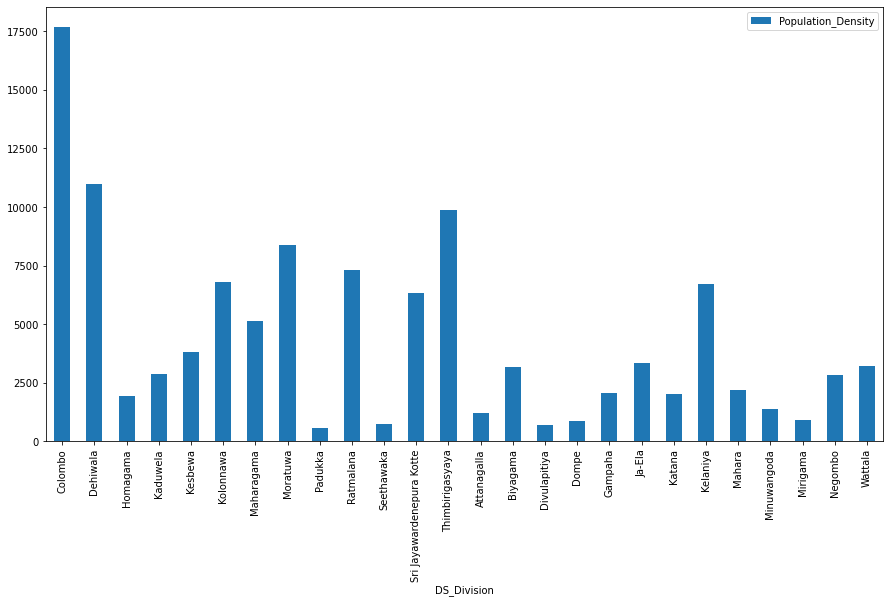

In [24]:
plt.rcParams["figure.figsize"] = [15,8]
colgam_data.plot(kind='bar',x='DS_Division',y='Population_Density')

From the above plot we see that Colombo is highly popululated DS division and we will remove Colombo

In [25]:
colgam_data = colgam_data[colgam_data['DS_Division'] !='Colombo']
colgam_data = colgam_data.reset_index(drop=True)
colgam_data.head()

,DS_Division,Population_Density,Latitude,Longitude
0,Dehiwala,10979.0,6.851279,79.865977
1,Homagama,1952.0,6.841273,80.003058
2,Kaduwela,2864.0,6.935703,79.984331
3,Kesbewa,3813.0,6.795740,79.940848
4,Kolonnawa,6815.0,6.932625,79.890314


Let's add a column called Distance_To_Colombo after calcualting the distance from colombo city to each DS Divisions

In [26]:
colgam_data_temp=colgam_data.copy() # get a copy of the dataframe

start_lat = np.radians(col_latitude)
start_lon = np.radians(col_longitude)
 
colgam_data_temp['Latitude'] = np.radians(colgam_data_temp['Latitude'])
colgam_data_temp['Longitude'] = np.radians(colgam_data_temp['Longitude'])
 
R = 6371.01
 
colgam_data_temp['Dis_To_Colombo'] = round(R * np.arccos(np.sin(start_lat) * np.sin(colgam_data_temp['Latitude']) + 
                                np.cos(start_lat) * np.cos(colgam_data_temp['Latitude']) * 
                                np.cos(start_lon - colgam_data_temp['Longitude'])),1)
colgam_data_temp.head()

,DS_Division,Population_Density,Latitude,Longitude,Dis_To_Colombo
0,Dehiwala,10979.0,0.119577,1.393924,9.8
1,Homagama,1952.0,0.119403,1.396317,19.7
2,Kaduwela,2864.0,0.121051,1.395990,14.4
3,Kesbewa,3813.0,0.118608,1.395231,18.6
4,Kolonnawa,6815.0,0.120997,1.394349,4.1


In [27]:
colgam_data = colgam_data.set_index('DS_Division').join(colgam_data_temp.set_index('DS_Division')['Dis_To_Colombo'])
colgam_data.reset_index(inplace=True)
colgam_data.head()

,DS_Division,Population_Density,Latitude,Longitude,Dis_To_Colombo
0,Dehiwala,10979.0,6.851279,79.865977,9.8
1,Homagama,1952.0,6.841273,80.003058,19.7
2,Kaduwela,2864.0,6.935703,79.984331,14.4
3,Kesbewa,3813.0,6.795740,79.940848,18.6
4,Kolonnawa,6815.0,6.932625,79.890314,4.1


In [28]:
colgam_data.shape

(25, 5)

We remove DS Divisions which are more than 20km from the colombo city and create a new data fame called col_suburb_data

In [29]:
col_suburb_data = colgam_data[colgam_data['Dis_To_Colombo'] < 20.0]
col_suburb_data = col_suburb_data.reset_index(drop=True)
col_suburb_data.head()

,DS_Division,Population_Density,Latitude,Longitude,Dis_To_Colombo
0,Dehiwala,10979.0,6.851279,79.865977,9.8
1,Homagama,1952.0,6.841273,80.003058,19.7
2,Kaduwela,2864.0,6.935703,79.984331,14.4
3,Kesbewa,3813.0,6.795740,79.940848,18.6
4,Kolonnawa,6815.0,6.932625,79.890314,4.1


In [30]:
col_suburb_data.shape

(15, 5)

Will mark the DS Divisions on the map and draw 20km circle with center as Colombo city and see How DS Division lies on the map

In [31]:
# create map of colombo using latitude and longitude values
map_colombo= folium.Map(location=[col_latitude, col_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(col_suburb_data['Latitude'], col_suburb_data['Longitude'], col_suburb_data['DS_Division']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colombo)
    
    folium.Circle([col_latitude, col_longitude],
                    radius=20000, color='red',).add_to(map_colombo) 
    
map_colombo

<h3>Exploring Nearby Venues</h3>  

Get nearby venues for all the DS Divisions in Colombo Suburbs

In [32]:
CLIENT_ID = 'WAFDWOFI52Y2BWGF4QM5KYQHBE2JI2TOUI54L1MJ24UW5D11' # my Foursquare ID
CLIENT_SECRET = 'HDAKUFNCMGN5YXCQIDOTKOFQXQVMYHDU00RTUHLWZDJJASPG' # my Foursquare Secret
VERSION = '20200508' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WAFDWOFI52Y2BWGF4QM5KYQHBE2JI2TOUI54L1MJ24UW5D11
CLIENT_SECRET:HDAKUFNCMGN5YXCQIDOTKOFQXQVMYHDU00RTUHLWZDJJASPG


In [33]:
def getNearbyVenues(dsdivisions, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for dsdivision, lat, lng in zip(dsdivisions, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            dsdivision, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['DS_Division', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Use the above function on each DS Division and create a new dataframe called colombosubur_venues.

In [34]:
colombosubur_venues = getNearbyVenues(dsdivisions=col_suburb_data['DS_Division'],
                                   latitudes=col_suburb_data['Latitude'],
                                   longitudes=col_suburb_data['Longitude']
                                  )

In [35]:
print(colombosubur_venues.shape)
colombosubur_venues.head()

(488, 5)


,DS_Division,Latitude,Longitude,Venue,Venue Category
0,Dehiwala,6.851279,79.865977,Al-Ameen Traders,Women's Store
1,Dehiwala,6.851279,79.865977,Yum Yum Fine Foods,Candy Store
2,Dehiwala,6.851279,79.865977,Beach House Bistro,Beach Bar
3,Dehiwala,6.851279,79.865977,Srina Palace,Cosmetics Shop
4,Dehiwala,6.851279,79.865977,Salon Anoma,Cosmetics Shop


In [36]:
colombosubur_venues['DS_Division'].unique().size

15

Let's check how many venues were returned for each DS Division

In [37]:
colombosubur_venues.groupby('DS_Division').count()

,Latitude,Longitude,Venue,Venue Category
DS_Division,,,,
Biyagama,11,11,11,11
Dehiwala,84,84,84,84
Homagama,7,7,7,7
Ja-Ela,15,15,15,15
Kaduwela,10,10,10,10
Kelaniya,12,12,12,12
Kesbewa,19,19,19,19
Kolonnawa,24,24,24,24
Mahara,24,24,24,24


let's check how many unique categories are available

In [38]:
colombosubur_venues['Venue Category'].unique().size

119

Use onehot encoding to create a new Data frame called colombo_onehot with columns contaning these unique categories

In [39]:
# one hot encoding
colombo_onehot = pd.get_dummies(colombosubur_venues[['Venue Category']], prefix="", prefix_sep="")

# add PostalCode column back to dataframe
colombo_onehot['DS_Division'] = colombosubur_venues['DS_Division'] 

# move neighborhood column to the first column
fixed_columns = [colombo_onehot.columns[-1]] + list(colombo_onehot.columns[:-1])
colombo_onehot = colombo_onehot[fixed_columns]

colombo_onehot.head()

,DS_Division,ATM,Airport,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flower Shop,Food,Food Court,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,General Travel,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lake,Light Rail Station,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,North Indian Restaurant,Office,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Pub,Racetrack,Recording Studio,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,South Indian Restaurant,Spa,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toll Booth,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Dehiwala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Dehiwala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Dehiwala,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Dehiwala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dehiwala,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


let's group rows by DS Division and by taking the mean of the frequency of occurrence of each category

In [40]:
colombosuburb_grouped = colombo_onehot.groupby('DS_Division').mean().reset_index()
colombosuburb_grouped

,DS_Division,ATM,Airport,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Beach,Beach Bar,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flower Shop,Food,Food Court,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,General Travel,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lake,Light Rail Station,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,North Indian Restaurant,Office,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Pub,Racetrack,Recording Studio,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,South Indian Restaurant,Spa,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Tea Room,Tech Startup,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Toll Booth,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Biyagama,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.090909,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.090909,0.090909,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
1,Dehiwala,0.000000,0.000000,0.011905,0.00,0.071429,0.011905,0.011905,0.000000,0.083333,0.011905,0.00,0.023810,0.011905,0.011905,0.000000,0.000000,0.00,0.000000,0.011905,0.000000,0.000000,0.000000,0.023810,0.011905,0.023810,0.071429,0.011905,0.011905,0.011905,0.035714,0.000000,0.00,0.00,0.011905,0.00,0.011905,0.00,0.023810,0.035714,0.00,0.000000,0.000000,0.000000,0.011905,0.00,0.000000,0.00,0.00,0.00,0.011905,0.023810,0.011905,0.011905,0.011905,0.011905,0.000000,0.011905,0.000000,0.011905,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.011905,0.00,0.011905,0.011905,0.011905,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.011905,0.00,0.000000,0.00,0.000000,0.047619,0.000000,0.011905,0.00,0.011905,0.000000,0.000000,0.000000,0.071429,0.011905,0.035714,0.000000,0.000000,0.023810,0.00,0.00,0.000000,0.000000,0.000000,0.011905,0.035714,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.011905
2,Homagama,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0

confirm the new size

In [41]:
colombosuburb_grouped.shape

(15, 120)

Get top 10 venue for each DS Dision 

First, let's write a function to sort the venues in descending order.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each DS Division

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['DS_Division']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dsdivisions_venues_sorted = pd.DataFrame(columns=columns)
dsdivisions_venues_sorted['DS_Division'] = colombosuburb_grouped['DS_Division']

for ind in np.arange(colombosuburb_grouped.shape[0]):
    dsdivisions_venues_sorted.iloc[ind, 1:] = return_most_common_venues(colombosuburb_grouped.iloc[ind, :], num_top_venues)

dsdivisions_venues_sorted.head()

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Biyagama,Pharmacy,Bakery,Breakfast Spot,Pizza Place,Supermarket,Restaurant,Chinese Restaurant,Bar,Grocery Store,Gym
1,Dehiwala,Bakery,Clothing Store,Asian Restaurant,Restaurant,Pizza Place,Fast Food Restaurant,Supermarket,Seafood Restaurant,Cosmetics Shop,Shopping Mall
2,Homagama,Train Station,Hotel,Supermarket,Clothing Store,Bus Station,Women's Store,Donut Shop,Flower Shop,Fast Food Restaurant,Electronics Store
3,Ja-Ela,Pizza Place,Train Station,Supermarket,Platform,Clothing Store,Department Store,Restaurant,Seafood Restaurant,Movie Theater,Fast Food Restaurant
4,Kaduwela,Boutique,Bar,Chinese Restaurant,Restaurant,Bus Station,Pizza Place,Supermarket,Pharmacy,Grocery Store,Gym


<h3>Clustering DS Divisions</h3> 

Use K-Means Elbow Method find out the best K value

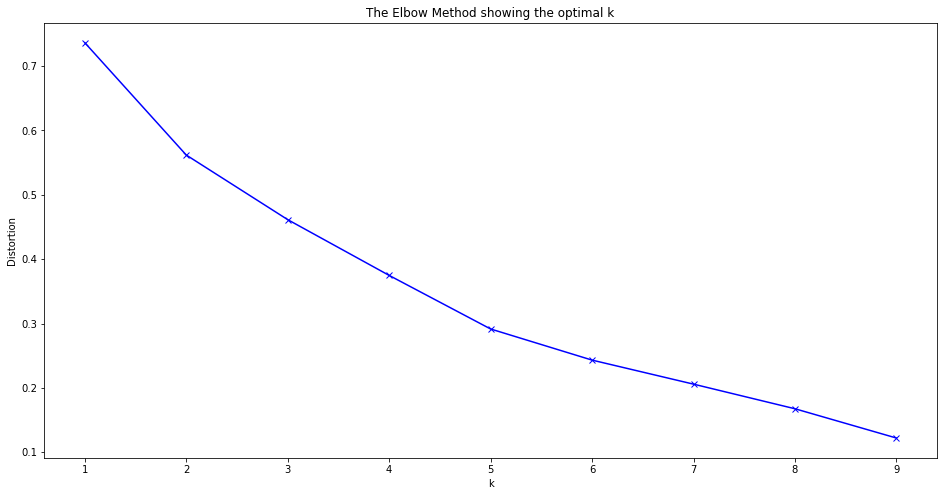

In [44]:
colombosuburb_grouped_clustering = colombosuburb_grouped.drop('DS_Division', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(colombosuburb_grouped_clustering)
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As per the above graph optimum k values is 5. Run k-means to cluster the neighborhood into 5 clusters.

In [45]:
# set number of clusters
kclusters = 5

colombosuburb_grouped_clustering = colombosuburb_grouped.drop('DS_Division', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(colombosuburb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 4, 3, 1, 1, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each DS Division.

In [46]:
# add clustering labels
dsdivisions_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

col_suburb_merged = col_suburb_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
col_suburb_merged = col_suburb_merged.join(dsdivisions_venues_sorted.set_index('DS_Division'), on='DS_Division')

col_suburb_merged.head() 

,DS_Division,Population_Density,Latitude,Longitude,Dis_To_Colombo,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dehiwala,10979.0,6.851279,79.865977,9.8,0,Bakery,Clothing Store,Asian Restaurant,Restaurant,Pizza Place,Fast Food Restaurant,Supermarket,Seafood Restaurant,Cosmetics Shop,Shopping Mall
1,Homagama,1952.0,6.841273,80.003058,19.7,2,Train Station,Hotel,Supermarket,Clothing Store,Bus Station,Women's Store,Donut Shop,Flower Shop,Fast Food Restaurant,Electronics Store
2,Kaduwela,2864.0,6.935703,79.984331,14.4,3,Boutique,Bar,Chinese Restaurant,Restaurant,Bus Station,Pizza Place,Supermarket,Pharmacy,Grocery Store,Gym
3,Kesbewa,3813.0,6.795740,79.940848,18.6,1,Bakery,Grocery Store,Clothing Store,Fast Food Restaurant,Bus Station,Asian Restaurant,Department Store,Chinese Restaurant,Restaurant,Supermarket
4,Kolonnawa,6815.0,6.932625,79.890314,4.1,0,Convenience Store,ATM,IT Services,Bus Stop,Gym,Juice Bar,Fruit & Vegetable Store,Office,Department Store,Park


Show the clusters on the Map

In [47]:
# create map
map_clusters = folium.Map(location=[col_latitude, col_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(col_suburb_merged['Latitude'], col_suburb_merged['Longitude'], col_suburb_merged['DS_Division'], col_suburb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

cluster 1

In [48]:
col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 0, col_suburb_merged.columns[[0] + list(range(6, col_suburb_merged.shape[1]))]]

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dehiwala,Bakery,Clothing Store,Asian Restaurant,Restaurant,Pizza Place,Fast Food Restaurant,Supermarket,Seafood Restaurant,Cosmetics Shop,Shopping Mall
4,Kolonnawa,Convenience Store,ATM,IT Services,Bus Stop,Gym,Juice Bar,Fruit & Vegetable Store,Office,Department Store,Park
5,Maharagama,Supermarket,Bakery,Diner,Gym / Fitness Center,Asian Restaurant,Gym,Burger Joint,Pizza Place,Chinese Restaurant,Movie Theater
7,Ratmalana,Train Station,Bakery,Restaurant,Supermarket,Clothing Store,Bookstore,Pharmacy,Pizza Place,Department Store,Pub
8,Sri Jayawardenepura Kotte,Bakery,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Coffee Shop,Juice Bar,Track,Supermarket,Restaurant,Food
9,Thimbirigasyaya,Café,Bakery,Dessert Shop,Restaurant,Pub,Bookstore,Coffee Shop,Hotel,Office,Chinese Restaurant
13,Mahara,Restaurant,Supermarket,Bus Station,Pizza Place,Clothing Store,Bakery,Ice Cream Shop,Grocery Store,Hotel Bar,Gym
14,Wattala,Bakery,Train Station,Clothing Store,Restaurant,Supermarket,Toll Booth,Food,Fast Food Restaurant,Pizza Place,Comfort Food Restaurant


cluster 2

In [49]:
col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 1, col_suburb_merged.columns[[0] + list(range(6, col_suburb_merged.shape[1]))]]

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Kesbewa,Bakery,Grocery Store,Clothing Store,Fast Food Restaurant,Bus Station,Asian Restaurant,Department Store,Chinese Restaurant,Restaurant,Supermarket
12,Kelaniya,Bus Station,Bakery,Chinese Restaurant,Supermarket,Grocery Store,Convenience Store,Department Store,Pizza Place,Fruit & Vegetable Store,Dessert Shop


cluster 3

In [50]:
col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 2, col_suburb_merged.columns[[0] + list(range(6, col_suburb_merged.shape[1]))]]

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Homagama,Train Station,Hotel,Supermarket,Clothing Store,Bus Station,Women's Store,Donut Shop,Flower Shop,Fast Food Restaurant,Electronics Store


cluster 4

In [51]:
col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 3, col_suburb_merged.columns[[0] + list(range(6, col_suburb_merged.shape[1]))]]

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kaduwela,Boutique,Bar,Chinese Restaurant,Restaurant,Bus Station,Pizza Place,Supermarket,Pharmacy,Grocery Store,Gym
10,Biyagama,Pharmacy,Bakery,Breakfast Spot,Pizza Place,Supermarket,Restaurant,Chinese Restaurant,Bar,Grocery Store,Gym


Cluster 5

In [52]:
col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 4, col_suburb_merged.columns[[0] + list(range(6, col_suburb_merged.shape[1]))]]

,DS_Division,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Moratuwa,Pizza Place,Chinese Restaurant,Train Station,Supermarket,Bar,Restaurant,Fast Food Restaurant,Food,Lake,Tech Startup
11,Ja-Ela,Pizza Place,Train Station,Supermarket,Platform,Clothing Store,Department Store,Restaurant,Seafood Restaurant,Movie Theater,Fast Food Restaurant


<h3>Results</h3> 

Get the details of the modern neighborhood cluster which is cluster 1

In [53]:
cluster_1=col_suburb_merged.loc[col_suburb_merged['Cluster Labels'] == 0, col_suburb_merged.columns[[0]]]
selected_DSs = col_suburb_data.set_index('DS_Division').join(cluster_1.set_index('DS_Division'), how="inner")
selected_DSs 

,Population_Density,Latitude,Longitude,Dis_To_Colombo
DS_Division,,,,
Dehiwala,10979.0,6.851279,79.865977,9.8
Kolonnawa,6815.0,6.932625,79.890314,4.1
Maharagama,5141.0,6.847278,79.926608,12.9
Ratmalana,7320.0,6.815259,79.866778,13.8
Sri Jayawardenepura Kotte,6324.0,6.888322,79.918741,9.1
Thimbirigasyaya,9874.0,6.897905,79.869608,4.9
Mahara,2205.0,6.991303,79.939375,11.1
Wattala,3228.0,6.989871,79.892709,7.1
